In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams['font.size'] = 20


In [2]:
t1t2_pth = "./data/oasis/dice_scores_for_eval_20250829.csv"

In [3]:
t1t2_df = pd.read_csv(t1t2_pth)

In [4]:
ixi_dices = pd.read_csv("./data/ixi/t1t2_dices.csv")

In [5]:
import scipy.stats as sps

In [6]:
sps.mannwhitneyu(ixi_dices["dice_y"], t1t2_df["dice"])

MannwhitneyuResult(statistic=np.float64(161573.0), pvalue=np.float64(4.357749065267752e-05))

In [7]:
def new_id1(x):
    sub = x.split("sub-")[-1].split("-")[0]
    if x.find("sess") > 0:
        sess = x.split("sess-")[-1]
    else:
        sess = x.split("ses-")[-1]

    return sub + "_" + sess

t1t2_df["oasisid_sessionid"] = t1t2_df["subject_id"].apply(new_id1)
t1t2_df["OASISID"] = t1t2_df["oasisid_sessionid"].apply(lambda x: x.split("_")[0])
t1t2_df["session_id"] = t1t2_df["oasisid_sessionid"].apply(lambda x: x.split("_")[1])
t1t2_df["days_to_visit"] = t1t2_df["session_id"].apply(lambda x: int(x[1:]))

In [8]:
pheno = pd.read_csv("./data/oasis/oasis3_phenotypes.csv")

In [9]:
pheno["days_to_visit"] = pheno["oasisid_sessionid"].apply(lambda x: x.split("_")[-1][1:]).astype(int)

In [10]:
fs = pd.read_csv("./data/oasis/oasis3_freesurfer_output.csv")

In [11]:
fs["oasisid_sessionid"] = fs["MR_session"].apply(lambda x: x.split("_")[0]) + "_" + fs["MR_session"].apply(lambda x: x.split("_")[-1])
fs["days_to_visit_fs"] = fs["MR_session"].apply(lambda x: x.split("_")[-1][1:]).astype(int)

In [12]:
vessels_fs = pd.merge(t1t2_df, fs, on="oasisid_sessionid", how="inner")

In [13]:
merged = pd.merge(pheno, vessels_fs, on="OASISID")

In [14]:
merged["age_at_pheno_days"] = merged["age at visit"] * 365

In [15]:
merged0 = merged[merged["days_to_visit_x"] == 0]

In [16]:
merged0["age_at_fs_days"] = merged0["days_to_visit_y"] + merged0["age_at_pheno_days"]

/var/folders/px/t5ym05pn5k16nz97mzcpqqkr0000gn/T/ipykernel_44019/93457961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged0["age_at_fs_days"] = merged0["days_to_visit_y"] + merged0["age_at_pheno_days"]


In [17]:
merged0.dropna(subset=["age_at_fs_days", "dice"], inplace=True)

/var/folders/px/t5ym05pn5k16nz97mzcpqqkr0000gn/T/ipykernel_44019/1240711465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged0.dropna(subset=["age_at_fs_days", "dice"], inplace=True)


In [18]:
import scipy.stats as sps

In [19]:
sps.pearsonr(merged0["dice"], merged0["age_at_fs_days"])

PearsonRResult(statistic=np.float64(-0.2896502654874184), pvalue=np.float64(2.3694732894434793e-13))

In [20]:
merged0["qc"] = merged0["FS QC Status"]

/var/folders/px/t5ym05pn5k16nz97mzcpqqkr0000gn/T/ipykernel_44019/1192278220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged0["qc"] = merged0["FS QC Status"]


In [21]:
merged0["binary_qc"] = merged0["FS QC Status"].apply(lambda x: 1 if x=="Passed" else 0)

/var/folders/px/t5ym05pn5k16nz97mzcpqqkr0000gn/T/ipykernel_44019/1454593621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged0["binary_qc"] = merged0["FS QC Status"].apply(lambda x: 1 if x=="Passed" else 0)


/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


mean: 0.47268039850731713 +/- 0.1975008205707863 sd


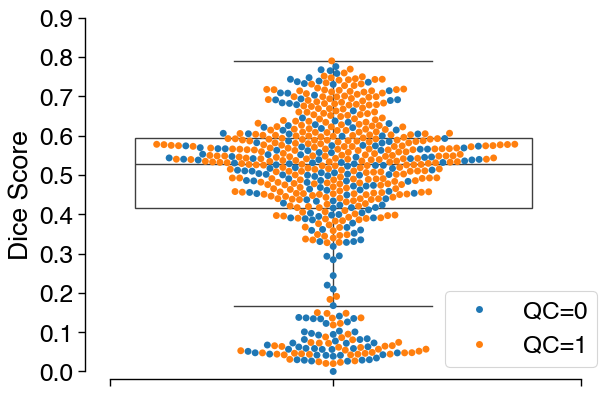

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", font_scale=2)

ax = sns.boxplot(y="dice", data=merged0,
            showcaps=True, boxprops={'facecolor':'None'},
            showfliers=False)#, whiskerprops={'linewidth':0})

ax = sns.swarmplot(y='dice', data=merged0, hue="binary_qc",
                   size=5, ax=ax, legend=True)

ax = plt.gca()

x = 0
mean = merged0["dice"].mean()
std = merged0["dice"].std()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.02, 0.92])
ax.set_xticks([-0.45] + ax.get_xticks() + [0.5])
tl = ax.get_xticklabels()
tl[0] = ""
tl[-1] = ""
ax.set_yticks(np.arange(0, 1, 0.1))
ax.spines['bottom'].set_bounds(-0.45, 0.5)
ax.spines['left'].set_bounds(0, 0.9)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.ylabel('Dice Score')
plt.xlabel('')

print(f"mean: {mean} +/- {std} sd")

ll = ax.get_legend()
tt0, tt1 = ll.get_texts()
ll.set_title(False)
tt0.set_text("QC=0")
tt1.set_text("QC=1")
ll.set_loc("lower left")
ll.set_bbox_to_anchor([0.7, 0])

/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


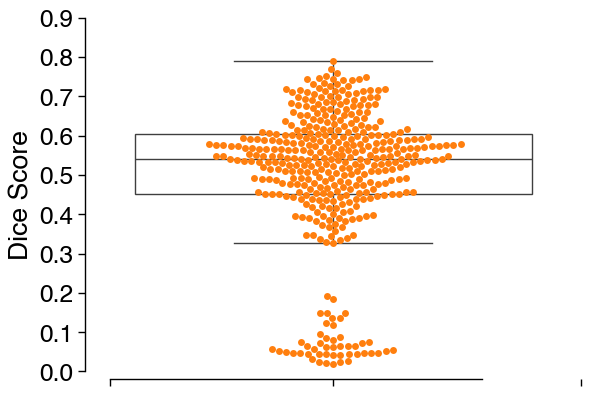

mean: 0.47268039850731713 +/- 0.1975008205707863 sd


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", font_scale=2)

# sns.swarmplot(y='dice', data=merged0, hue="binary_qc",
#               size=5)

ax = sns.boxplot(y="dice", data=merged0[merged0["binary_qc"].astype(bool)],
            showcaps=True, boxprops={'facecolor':'None'},
            showfliers=False)#, whiskerprops={'linewidth':0})

ax = sns.swarmplot(y='dice', data=merged0[merged0["binary_qc"].astype(bool)], # hue="binary_qc",
                   size=5, ax=ax)

ax = plt.gca()

x = 0
mean = merged0["dice"].mean()
std = merged0["dice"].std()

# plt.scatter(x, mean, color='k', marker='_', s=400, linewidths=5,
#             alpha=1, zorder=5)

# plt.scatter(x, mean + std, color='k', marker='_', s=400, linewidths=5,
#             alpha=1, zorder=5)

# plt.scatter(x, mean - std, color='k', marker='_', s=400, linewidths=5,
#             alpha=1, zorder=5)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim([-0.4, 2.42])
ax.set_ylim([-0.02, 0.92])
ax.set_xticks([-0.45] + ax.get_xticks() + [0.5])
tl = ax.get_xticklabels()
tl[0] = ""
tl[-1] = ""
ax.set_yticks(np.arange(0, 1, 0.1))
#ax.set_xticklabels(tl)
ax.spines['bottom'].set_bounds(-0.45, 0.3)
ax.spines['left'].set_bounds(0, 0.9)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), ['Mean', '+/- std'], loc='upper right')
# plt.title('5 fold k-val Dice Score on IXI dataset by Input Modality')
plt.ylabel('Dice Score')
plt.xlabel('')
# plt.ylim(0, 0.9)
plt.show()

print(f"mean: {mean} +/- {std} sd")


In [24]:
merged0[merged0["dice"]>0.17]["binary_qc"].mean(), merged0[merged0["dice"]<0.17]["binary_qc"].mean(), 1-(merged0["dice"]>0.17).mean()

(np.float64(0.6896551724137931),
 np.float64(0.4838709677419355),
 np.float64(0.15121951219512197))

In [25]:
merged0[merged0["binary_qc"]==1]["dice"].mean(), merged0[merged0["binary_qc"]==1]["dice"].std()

(np.float64(0.4987645371975309), np.float64(0.1811631011148215))

In [26]:
merged0[merged0["binary_qc"]==0]["dice"].mean(), merged0[merged0["binary_qc"]==0]["dice"].std()

(np.float64(0.42237527389047624), np.float64(0.2174641427660785))

In [27]:
from scipy.stats import ttest_ind

In [28]:
ttest_ind(merged0[merged0["binary_qc"]==0]["dice"], merged0[merged0["binary_qc"]==1]["dice"])

TtestResult(statistic=np.float64(-4.623297293060013), pvalue=np.float64(4.608260922988382e-06), df=np.float64(613.0))

In [29]:
sps.mannwhitneyu(ixi_dices["dice_y"], merged0["dice"])

MannwhitneyuResult(statistic=np.float64(150113.0), pvalue=np.float64(8.244321249542345e-05))